# Implement a KNN model to classify the animals in to categories.

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Reading the dataset

In [3]:
df=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\Zoo.csv")

EDA

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.drop(['animal name'],axis=1,inplace=True)

In [6]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df.tail()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [9]:
df.shape

(101, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [11]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Splitting into dependent and independent variables

In [15]:
x=df.iloc[:,0:16]
y=df.iloc[:,-1]

In [16]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

Grid Search for Algorithm Tuning

In [18]:
n_neighbors=list(range(1,41))  
parameters={'n_neighbors':n_neighbors}

In [19]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [20]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


KNN classification

In [21]:
model1=KNeighborsClassifier(n_neighbors=1)  

In [22]:
model1.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [24]:
kfold=KFold(n_splits=10)
results=cross_val_score(model1,x,y,cv=kfold)

In [25]:
results

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9])

In [26]:
results.mean()

0.9800000000000001

Visualizing the CV results

In [30]:
k_range=range(1,41)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Us

In [31]:
k_scores

[0.97,
 0.9199999999999999,
 0.93,
 0.9004761904761904,
 0.8509523809523811,
 0.8509523809523811,
 0.8414285714285714,
 0.8014285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7228571428571429,
 0.7128571428571429,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.6928571428571428,
 0.6928571428571428,
 0.6128571428571428,
 0.5928571428571429,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5638095238095238,
 0.5638095238095238]

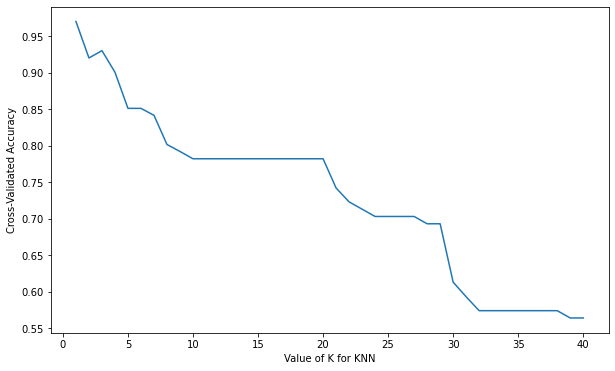

In [36]:
plt.figure(figsize=(10,6))
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [37]:
df_accuracy=pd.DataFrame({'Value of k':range(1,41),
                         'Accuracy':k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.970000
1,2,0.920000
2,3,0.930000
3,4,0.900476
4,5,0.850952
5,6,0.850952
6,7,0.841429
7,8,0.801429
8,9,0.791905
9,10,0.781905


In [38]:
df_accuracy.sort_values('Accuracy',ascending=False)

,Value of k,Accuracy
0,1,0.970000
2,3,0.930000
1,2,0.920000
3,4,0.900476
4,5,0.850952
5,6,0.850952
6,7,0.841429
7,8,0.801429
8,9,0.791905
14,15,0.781905
